In [61]:
import numpy as np
import pandas as pd
import os

## 0. CIFAR10 데이터셋 로드

In [62]:
from tensorflow.keras.datasets import cifar10

In [63]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [64]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [65]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## 1. CIFAR10 데이터 시각화

[6] 6 [9] 9 [9] 9 [4] 4 [1] 1 [1] 1 [2] 2 [7] 7 [8] 8 [3] 3 [4] 4 [7] 7 [7] 7 [2] 2 [9] 9 [9] 9 

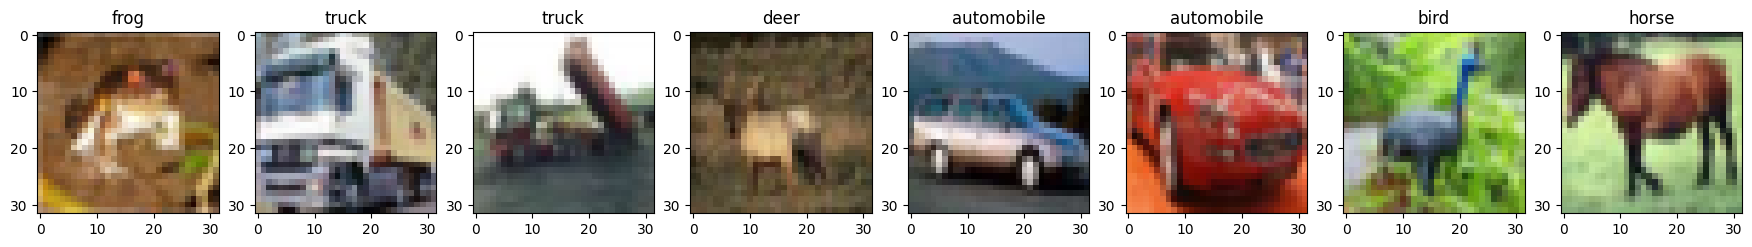

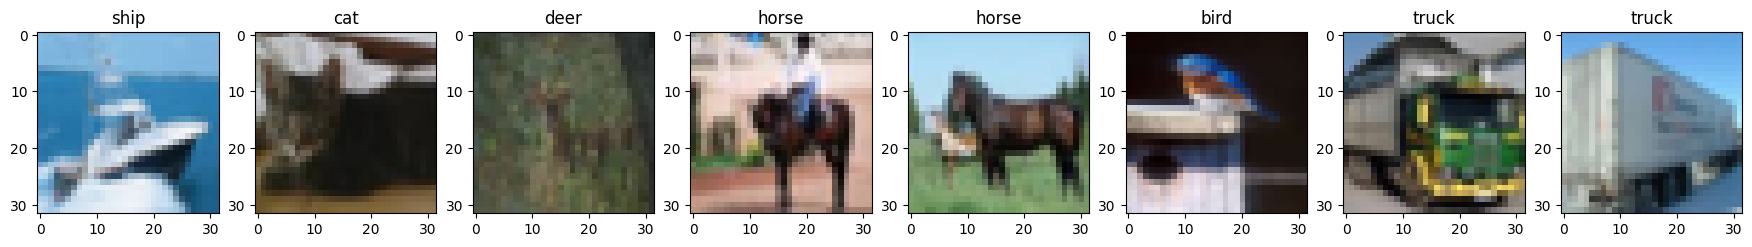

In [66]:
import matplotlib.pyplot as plt
import cv2

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        print(labels[i], end=' ')
        label = labels[i].squeeze() # 이전에 labels[i]를 출력해보면 차원이 다름, [6] => 6으로 만들기 위해 필요없는 차원을 날리는 squeeze적용
        print(label, end=' ')
        axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

## 2. Data Preprocessing

In [67]:
def get_preprocessed_data(images, labels):
    #학습과 테스트 이미지 array를 0~1 사ㅣ값으로 scale 및 float32형 변환
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)


#### compile 시 사용하는 비용함수
(1) 이진분류: binary_crossentropy

(2) 다중분류: categorical_crossentropy => fit학습을 할 때, y값이 one-hot encoding이 되어 있어야 함

(2-1) 만약 categorical_crossentropy 이후 fit 할때 one-hot encoding이 적용되지 않은 label-encoding일 경우, 대신 비용함수로 sparse-categorical-crossentropy를 사용해야 함

***4step: model설정-> compile -> fit -> predict

[최종정리]

(1)compile함수에서 loss=categorical_crossentropy일 경우 fit 시점의 label값을 one-hot encoding된 값으로 입력

(2)compile함수에서 loss=sparse_categorical_crosentropy일 경우 fit 시점의 label값을 label encoding된 값으로 입력

In [68]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [69]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [70]:
print(train_labels.squeeze())
print(test_labels.squeeze())

[6. 9. 9. ... 9. 1. 1.]
[3. 8. 8. ... 5. 1. 7.]


## 3. Custom Model 생성

In [71]:
with open('b.JPG','r') as f:
    print(f)

<_io.TextIOWrapper name='b.JPG' mode='r' encoding='cp949'>


In [72]:
IMG_SIZE = 32

In [73]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [74]:
input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor) #filters는 kernel을 여러겹 쌓는 것, 여기서는 32개의 kernel을 쌇음
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x) #앞서 input_tensor를 넣고 출력된 x를 입력값으로 다시 넣어서 다시 x값을 리턴으로 받음
x = MaxPooling2D(pool_size=(2, 2))(x)

In [75]:
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [76]:
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [77]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)

In [78]:
output = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [79]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=20, validation_split=0.15) # epochs가 1이므로, 아래 그래프에 그림이 그려지지 않음(최소 2번 이상 수행시 비교)

Epoch 1/20
665/665 [==============================] - 342s 512ms/step - loss: 1.1778 - accuracy: 0.5770 - val_loss: 1.0314 - val_accuracy: 0.6363
Epoch 2/20
665/665 [==============================] - 342s 515ms/step - loss: 0.9746 - accuracy: 0.6555 - val_loss: 0.9946 - val_accuracy: 0.6463
Epoch 3/20
665/665 [==============================] - 270s 405ms/step - loss: 0.8617 - accuracy: 0.6972 - val_loss: 0.7917 - val_accuracy: 0.7260
Epoch 4/20
665/665 [==============================] - 245s 368ms/step - loss: 0.7650 - accuracy: 0.7301 - val_loss: 0.7693 - val_accuracy: 0.7296
Epoch 5/20
665/665 [==============================] - 253s 381ms/step - loss: 0.7037 - accuracy: 0.7512 - val_loss: 0.7029 - val_accuracy: 0.7509
Epoch 6/20
665/665 [==============================] - 255s 384ms/step - loss: 0.6438 - accuracy: 0.7745 - val_loss: 0.7116 - val_accuracy: 0.7532
Epoch 7/20
665/665 [==============================] - 264s 397ms/step - loss: 0.5908 - accuracy: 0.7912 - val_loss: 0.6596 -

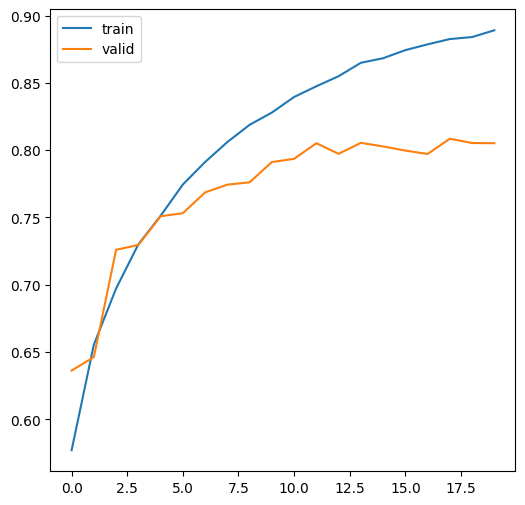

In [93]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [94]:
# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

313/313 [==============================] - 22s 70ms/step - loss: 0.6388 - accuracy: 0.8003


[0.6387816071510315, 0.8003000020980835]

In [ ]:
preds = model.predict(test_images[0]) #3차원이므로 오류발생 => 4차원으로 늘려주어야 함

In [96]:
print(f'size: {test_images[0].size}, type: {type(test_images[0])}, ndim: {test_images[0].ndim}')

size: 3072, type: <class 'numpy.ndarray'>, ndim: 3


In [97]:
preds = model.predict(np.expand_dims(test_images[0], axis=0)) #차원 늘림: 3차원=>4차원

1/1 [==============================] - 0s 135ms/step


In [98]:
print(f'size: {np.expand_dims(test_images[0], axis=0).size}, type: {type(np.expand_dims(test_images[0], axis=0))}, ndim: {np.expand_dims(test_images[0], axis=0).ndim}')

size: 3072, type: <class 'numpy.ndarray'>, ndim: 4


In [99]:
print('예측결과:shape:', preds.shape)
print('예측결과:', preds)
preds.argmax()

예측결과:shape: (1, 10)
예측결과: [[4.5980013e-04 7.6626922e-05 5.4251291e-03 5.2807295e-01 1.2299621e-03
  3.5263160e-01 8.9221373e-02 2.2092264e-02 7.0643786e-04 8.3931380e-05]]


3

In [100]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측결과 shape:', preds.shape)
print('예측결과:', preds)

1/1 [==============================] - 0s 178ms/step
예측결과 shape: (32, 10)
예측결과: [[4.59800183e-04 7.66269295e-05 5.42513281e-03 5.28073013e-01
  1.22996222e-03 3.52631480e-01 8.92213881e-02 2.20922790e-02
  7.06437626e-04 8.39313070e-05]
 [3.93376104e-06 6.41633233e-05 2.78395877e-13 2.40456851e-13
  2.13814037e-14 1.71081311e-15 1.65553348e-13 1.73497838e-16
  9.99931931e-01 7.95403032e-09]
 [1.06835663e-02 5.53388856e-02 7.85132329e-07 1.21804314e-05
  9.89541604e-08 4.51705858e-07 3.87822911e-06 3.42852445e-07
  9.33069766e-01 8.90075171e-04]
 [1.57594010e-01 1.36325916e-03 4.36677437e-05 3.69570785e-06
  3.04162000e-07 1.26082156e-07 9.40316269e-08 7.84458621e-07
  8.40971649e-01 2.24193955e-05]
 [8.86375329e-09 4.15321075e-08 5.79894194e-03 6.75431656e-05
  1.13425376e-04 2.48720653e-07 9.94019747e-01 1.94464278e-10
  1.16261816e-07 9.95246907e-09]
 [3.12536067e-05 2.73671930e-09 9.42738168e-03 3.61056238e-01
  6.27660602e-02 2.71258086e-01 2.94808477e-01 6.48461457e-04
  8.9728700

In [101]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 8 6 3 1 6 3 9 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 3 0 9 6 6 5]


3 3 8 8 8 8 8 8 6 6 3 3 1 1 6 6 [3.] 3.0 [8.] 8.0 [8.] 8.0 [0.] 0.0 [6.] 6.0 [6.] 6.0 [1.] 1.0 [6.] 6.0 

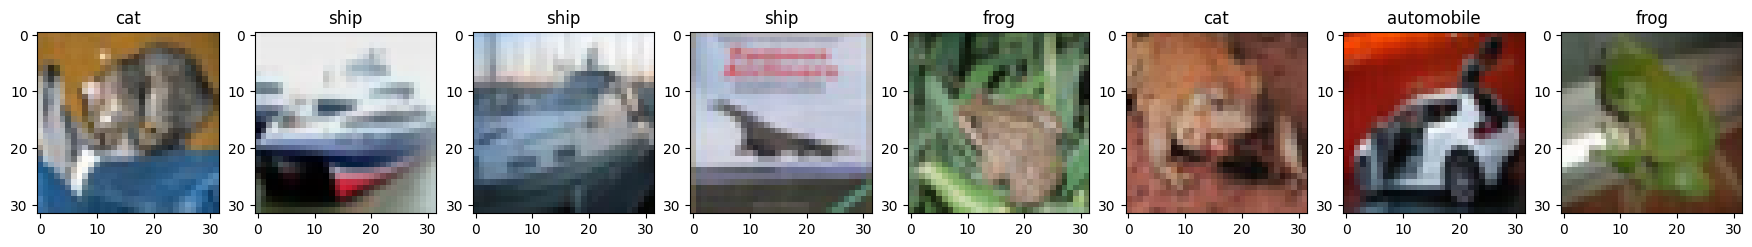

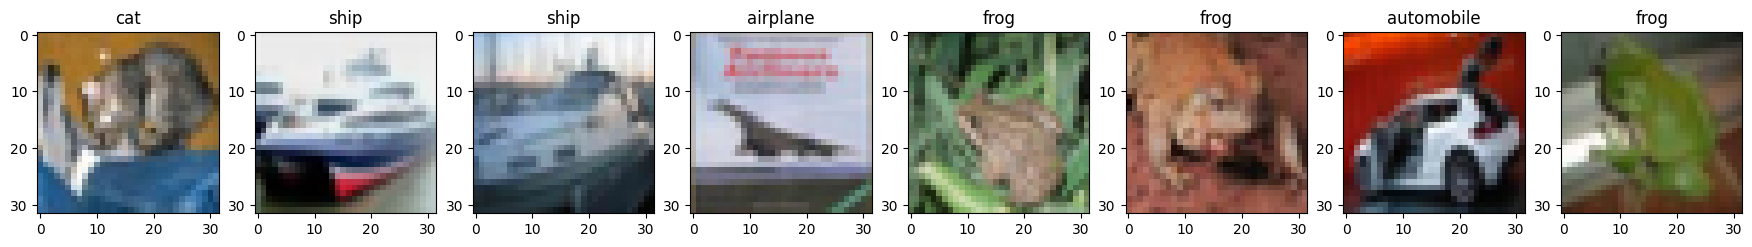

In [102]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)